In [5]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt

In [3]:
model=GEKKO(remote=False)
# Decision Variables

lx=model.Var() # coordinate of circle center
ly=model.Var() # coordinate of circle center
lr=model.Var() # Circle radius

# parameter

la=model.Param(value=0.30) # rectangular steel plate 
lb=model.Param(value=0.20) # rectangular steel plate
# Constraints
model.Equation(lr-lx<=0) # Constraint on the circle position
model.Equation(lr-ly<=0) # Constraint on the circle position
model.Equation(lr-(la-lx)<=0) # Constraint on the circle position
model.Equation(lr-(lb-ly)<=0)# Constraint on the circle position
# Objective function
model.Obj(la*lb-np.pi*lr**2)
# Solve the problem
model.solve(disp=False)

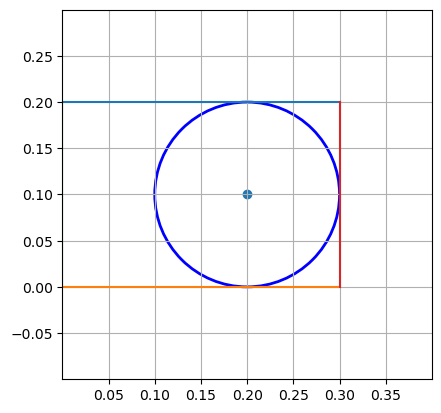

In [12]:
center_x, center_y = lx.value[0], ly.value[0] # circle center values
radius =lr.value[0] # circle radius

# Create figure
fig, ax = plt.subplots()

# Draw circle
circle = plt.Circle((center_x, center_y), radius, fill=False, color='blue', linewidth=2)
ax.add_patch(circle)

# Set limits and aspect
ax.set_xlim(center_x - radius - 0.1, center_x + radius + 0.1)
ax.set_ylim(center_y - radius - 0.1, center_y + radius + 0.1)
ax.set_aspect('equal')
plt.plot([0,0.3],[0.2,0.2])
plt.plot([0,0.3],[0,0])
plt.plot([0,0],[0,0.2])
plt.plot([0.3,0.3],[0,0.2])
plt.grid(True)
plt.scatter([center_x], [center_y])
plt.show()


In [32]:
model=GEKKO()
lx=model.Var()#coordinate of the first circle center
ly=model.Var() #coordinate of the firs circle center
lr=model.Var() # first circle radius
la=model.Param(value=0.3)# rectangular steel plate
lb=model.Param(value=0.2)# rectangular steel plate
model.Equation(lr-lx<=0)# Constraint on the first circle position
model.Equation(lr-ly<=0)# Constraint on the first circle position
model.Equation(lr-(la-lx)<=0)# Constraint on first the circle position
model.Equation(lr-(lb-ly)<=0)# Constraint on the first circle position
############################
lx1=model.Var()#coordinate of the second circle center
ly1=model.Var()#coordinate of the second circle center
lr1=model.Var()# second circle radius
model.Equation(lr1-lx1<=0)#Constraint on the second circle position
model.Equation(lr1-ly1<=0)#Constraint on the second circle position
model.Equation(lr1-(la-lx1)<=0)#Constraint on the second circle position
model.Equation(lr1-(lb-ly1)<=0)#Constraint on the second circle position
model.Equation(((lx-lx1)**2+(ly-ly1)**2)**0.5-(lr+lr1)>=0)# Overlapping constraint
model.Equation(-lr1<0) # constraint on the first circle radius
model.Equation(-lr<0) # constrait on the second circle radius
###########################
# Objective function
model.Obj(la*lb-np.pi*lr**2-np.pi*lr1**2)
model.solve(disp=False)

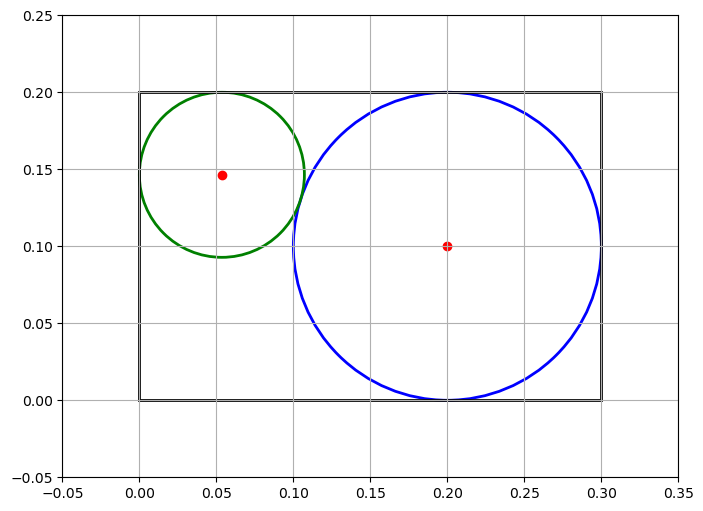

In [34]:
a, b = 0.3, 0.2
center1_x, center1_y=lx.value[0],ly.value[0] # First circle center
center2_x, center2_y=lx1.value[0],ly1.value[0]# Second circle center
r1,r2=lr.value[0],lr1.value[0] # circles radius
# Create figure
fig, ax = plt.subplots(figsize=(8,6))

# Draw circles
circle1 = plt.Circle((center1_x, center1_y), r1, fill=False, color='blue', linewidth=2)
circle2 = plt.Circle((center2_x, center2_y), r2, fill=False, color='green', linewidth=2)

ax.add_patch(circle1)
ax.add_patch(circle2)

# Draw rectangle
rect = plt.Rectangle((0,0), a, b, fill=False, color='black', linewidth=2)
ax.add_patch(rect)

# Set axis limits so all circles and rectangle are visible
ax.set_xlim(-0.05, a + 0.05)
ax.set_ylim(-0.05, b + 0.05)
ax.set_aspect('equal')

# Optional: plot centers
ax.scatter([center1_x, center2_x], [center1_y, center2_y], color='red')

plt.grid(True)
#plt.title('Two Circles inside Rectangle')
plt.show()

In [35]:
model=GEKKO()
lx=model.Var()#coordinate of the first circle center
ly=model.Var()#coordinate of the first circle center
lr=model.Var()# first circle radius
la=model.Param(value=0.3)#coordinate of the firs circle center
lb=model.Param(value=0.2)#coordinate of the firs circle center
model.Equation(lr-lx<=0)# Constraint on the first circle position
model.Equation(lr-ly<=0)# Constraint on the first circle position
model.Equation(lr-(la-lx)<=0)# Constraint on the first circle position
model.Equation(lr-(lb-ly)<=0)# Constraint on the first circle position
#model.Equation((lx-(la/2))**2+(ly-(lb/2))**2-(lb/2)**2<=0)
############################
lx1=model.Var()#coordinate of the second circle center
ly1=model.Var()#coordinate of the second circle center
lr1=model.Var()# second circle radius
model.Equation(lr1-lx1<=0)# Constraint on the second circle position
model.Equation(lr1-ly1<=0)# Constraint on the second circle position
model.Equation(lr1-(la-lx1)<=0)# Constraint on the second circle position
model.Equation(lr1-(lb-ly1)<=0)# Constraint on the second circle position
model.Equation(((lx-lx1)**2+(ly-ly1)**2)**0.5-(lr+lr1)>=0)# Overlapping constraint
################################
lx2=model.Var()#coordinate of the third circle center
ly2=model.Var()#coordinate of the third circle center
lr2=model.Var()# third circle radius
model.Equation(lr2-lx2<=0)# Constraint on the third circle position
model.Equation(lr2-ly2<=0)# Constraint on the third circle position
model.Equation(lr2-(la-lx2)<=0)# Constraint on the third circle position
model.Equation(lr2-(lb-ly2)<=0)# Constraint on the third circle position
model.Equation(((lx2-lx1)**2+(ly2-ly1)**2)**0.5-(lr2+lr1)>=0) # Overlapping constraint
model.Equation(((lx-lx2)**2+(ly-ly2)**2)**0.5-(lr+lr2)>=0) # Overlapping constraint
model.Equation(-lr1<-0.013) # constraint on the second circle radius
model.Equation(-lr<0) # constraint on the first circle radius
model.Equation(-lr2<0)# constraint on the third circle radius
###########################
# Objective
model.Obj(la*lb-np.pi*lr**2-np.pi*lr1**2-np.pi*lr2**2)
model.solve(disp=False)

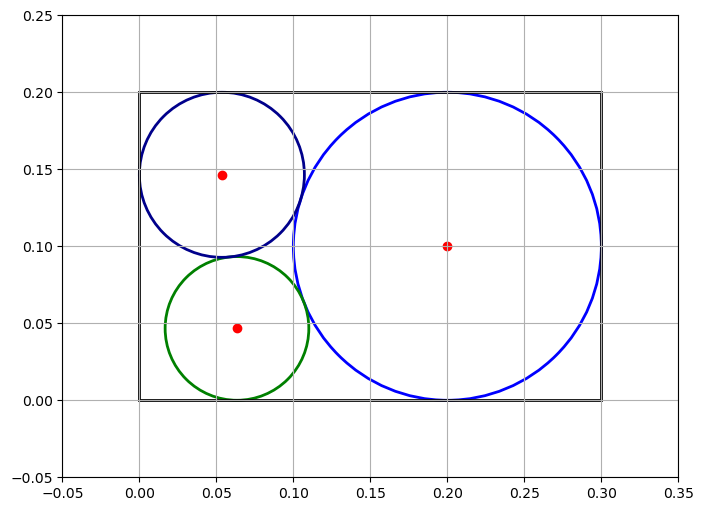

In [37]:
a, b = 0.3, 0.2
center1_x, center1_y=lx.value[0],ly.value[0] # first circle center
center2_x, center2_y=lx1.value[0],ly1.value[0]# second circle center
center3_x, center3_y=lx2.value[0],ly2.value[0]# their circle center
r1,r2,r3=lr.value[0],lr1.value[0],lr2.value[0]# circle radius
# Create figure
fig, ax = plt.subplots(figsize=(8,6))

# Draw circles
circle1 = plt.Circle((center1_x, center1_y), r1, fill=False, color='blue', linewidth=2)
circle2 = plt.Circle((center2_x, center2_y), r2, fill=False, color='green', linewidth=2)
circle3 = plt.Circle((center3_x, center3_y), r3, fill=False, color='darkblue', linewidth=2)

ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)

# Draw rectangle
rect = plt.Rectangle((0,0), a, b, fill=False, color='black', linewidth=2)
ax.add_patch(rect)

# Set axis limits so all circles and rectangle are visible
ax.set_xlim(-0.05, a + 0.05)
ax.set_ylim(-0.05, b + 0.05)
ax.set_aspect('equal')

# Optional: plot centers
ax.scatter([center1_x, center2_x,center3_x], [center1_y, center2_y,center3_y], color='red')

plt.grid(True)
#plt.title('Two Circles inside Rectangle')
plt.show()

In [43]:
model=GEKKO()
lx=model.Var()#coordinate of the first circle center
ly=model.Var()#coordinate of the first circle center
lr=model.Var()# first circle radius
la=model.Param(value=0.3)#coordinate of the firs circle center
lb=model.Param(value=0.2)#coordinate of the firs circle center
model.Equation(lr-lx<=0)# Constraint on the first circle position
model.Equation(lr-ly<=0)# Constraint on the first circle position
model.Equation(lr-(la-lx)<=0)# Constraint on the first circle position
model.Equation(lr-(lb-ly)<=0)# Constraint on the first circle position
#model.Equation((lx-(la/2))**2+(ly-(lb/2))**2-(lb/2)**2<=0)
############################
lx1=model.Var()#coordinate of the second circle center
ly1=model.Var()#coordinate of the second circle center
lr1=model.Var()# second circle radius
model.Equation(lr1-lx1<=0)# Constraint on the second circle position
model.Equation(lr1-ly1<=0)# Constraint on the second circle position
model.Equation(lr1-(la-lx1)<=0)# Constraint on the second circle position
model.Equation(lr1-(lb-ly1)<=0)# Constraint on the second circle position
model.Equation(((lx-lx1)**2+(ly-ly1)**2)**0.5-(lr+lr1)>=0)# Overlapping constraint
################################
lx2=model.Var()#coordinate of the third circle center
ly2=model.Var()#coordinate of the third circle center
lr2=model.Var()# third circle radius
model.Equation(lr2-lx2<=0)# Constraint on the third circle position
model.Equation(lr2-ly2<=0)# Constraint on the third circle position
model.Equation(lr2-(la-lx2)<=0)# Constraint on the third circle position
model.Equation(lr2-(lb-ly2)<=0)# Constraint on the third circle position
model.Equation(((lx2-lx1)**2+(ly2-ly1)**2)**0.5-(lr2+lr1)>=0) # Overlapping constraint
model.Equation(((lx-lx2)**2+(ly-ly2)**2)**0.5-(lr+lr2)>=0) # Overlapping constraint
model.Equation(-lr1<-0.013) # constraint on the second circle radius
model.Equation(-lr<0) # constraint on the first circle radius
model.Equation(-lr2<0)# constraint on the third circle radius
###########################
lx3=model.Var()#coordinate of the first circle center
ly3=model.Var()#coordinate of the first circle center
lr3=model.Var()# first circle radius
model.Equation(lr3-lx3<=0)# Constraint on the first circle position
model.Equation(lr3-ly3<=0)# Constraint on the first circle position
model.Equation(lr3-(la-lx3)<=0)# Constraint on the first circle position
model.Equation(lr3-(lb-ly3)<=0)# Constraint on the first circle position
model.Equation(((lx-lx3)**2+(ly-ly3)**2)**0.5-(lr+lr3)>=0)# Overlapping constraint
model.Equation(((lx3-lx1)**2+(ly3-ly1)**2)**0.5-(lr3+lr1)>=0)# Overlapping constraint
model.Equation(((lx3-lx2)**2+(ly3-ly2)**2)**0.5-(lr3+lr2)>=0)
model.Equation(-lr3<0)
# Objective
model.Obj(la*lb-np.pi*lr**2-np.pi*lr1**2-np.pi*lr2**2-np.pi*lr3**2)

In [44]:
model.solve(disp=False)

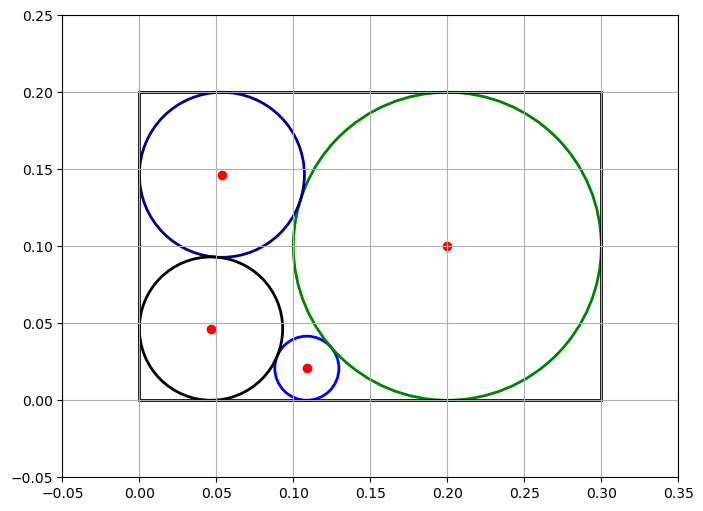

In [45]:
a, b = 0.3, 0.2
center1_x, center1_y=lx.value[0],ly.value[0] # first circle center
center2_x, center2_y=lx1.value[0],ly1.value[0]# second circle center
center3_x, center3_y=lx2.value[0],ly2.value[0]# their circle center
center4_x, center4_y=lx3.value[0],ly3.value[0]# their circle center
r1,r2,r3,r4=lr.value[0],lr1.value[0],lr2.value[0],lr3.value[0]# circle radius
# Create figure
fig, ax = plt.subplots(figsize=(8,6))

# Draw circles
circle1 = plt.Circle((center1_x, center1_y), r1, fill=False, color='blue', linewidth=2)
circle2 = plt.Circle((center2_x, center2_y), r2, fill=False, color='green', linewidth=2)
circle3 = plt.Circle((center3_x, center3_y), r3, fill=False, color='darkblue', linewidth=2)
circle4= plt.Circle((center4_x, center4_y), r4, fill=False, linewidth=2)

ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)
ax.add_patch(circle4)
# Draw rectangle
rect = plt.Rectangle((0,0), a, b, fill=False, color='black', linewidth=2)
ax.add_patch(rect)

# Set axis limits so all circles and rectangle are visible
ax.set_xlim(-0.05, a + 0.05)
ax.set_ylim(-0.05, b + 0.05)
ax.set_aspect('equal')

# Optional: plot centers
ax.scatter([center1_x, center2_x,center3_x,center4_x], [center1_y, center2_y,center3_y,center4_y], color='red')

plt.grid(True)
#plt.title('Three Circles inside Rectangle')
#plt.savefig('disk4.png')
plt.show()